# Load Dataset

In [28]:
import pandas as pd

# Baca file Excel
df_qris = pd.read_excel("D:\\KP\\sobatberbagi.com_dashboard\\data\\transaksi_qris.xlsx", skiprows=1)
df_manual = pd.read_excel("D:\\KP\\sobatberbagi.com_dashboard\\data\\transaksi_manual.xlsx", skiprows=1)

# Data Understanding

In [2]:
# Mnampilkan Informasi Data QRIS    
df_qris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             590 non-null    int64 
 1   Tanggal        590 non-null    object
 2   Nama Campaign  590 non-null    object
 3   Nama Donatur   584 non-null    object
 4   Total Donasi   590 non-null    object
 5   Status         590 non-null    object
dtypes: int64(1), object(5)
memory usage: 27.8+ KB


In [3]:
# Mnampilkan Informasi Data Manual   
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             246 non-null    int64 
 1   Tanggal        246 non-null    object
 2   Nama Campaign  246 non-null    object
 3   Nama Donatur   246 non-null    object
 4   Total Donasi   246 non-null    object
 5   Status         246 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.7+ KB


In [4]:
# Menampilkan Head Data QRIS
df_qris.head()

,No,Tanggal,Nama Campaign,Nama Donatur,Total Donasi,Status
0,1,26 Mei 2025 18:29,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.EI., M.SI.",Rp 100.000,Belum Di Konfirmasi
1,2,26 Mei 2025 18:28,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.EI., M.SI.",Rp 1.000,Belum Di Konfirmasi
2,3,26 Mei 2025 18:28,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.EI., M.SI.",Rp 1.000,Belum Di Konfirmasi
3,4,23 Mei 2025 08:01,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,Dhodi Junaedi,Rp 50.000,Berhasil
4,5,16 Mei 2025 23:27,Sedekah 1 Juta Al Quran untuk Negeri,Anggitya Yhusuf Fikrandi,Rp 100,Berhasil


In [5]:
# Menampilkan Head Data Manual
df_manual.head()

,No,Tanggal,Nama Campaign,Nama Donatur,Total Donasi,Status
0,1,26 Mei 2025 18:27,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.EI., M.SI.",Rp 150.332,Belum Di Konfirmasi
1,2,13 Mei 2025 11:45,Bangun Kembali Negeri Palestina Membangun Hara...,Priyo Aldo,Rp 1.329,Belum Di Konfirmasi
2,3,5 Mei 2025 17:16,Sentuh Mimpi: Edupreneur untuk Pendidikan Berk...,Hanif Nur Setiawan,Rp 50.000,Berhasil
3,4,5 Mei 2025 17:15,Sentuh Mimpi: Edupreneur untuk Pendidikan Berk...,Hanif Nur Setiawan,Rp 150.000,Berhasil
4,5,28 April 2025 15:01,Sentuh Mimpi: Edupreneur untuk Pendidikan Berk...,Afif Ilham Amanullah,Rp 250.055,Berhasil


In [6]:
# Menampilkan (Jumlah_Baris, Jumlah_Kolom) df qris
print("Jumlah baris & kolom:", df_qris.shape)

Jumlah baris & kolom: (590, 6)


In [7]:
# Menampilkan (Jumlah_Baris, Jumlah_Kolom) df manual
print("Jumlah baris & kolom:", df_manual.shape)

Jumlah baris & kolom: (246, 6)


In [8]:
# Cek Data yang Hilang di df qris
df_qris.isnull().sum()

No               0
Tanggal          0
Nama Campaign    0
Nama Donatur     6
Total Donasi     0
Status           0
dtype: int64

In [9]:
# Cek Data yang Hilang di df manual
df_manual.isnull().sum()

No               0
Tanggal          0
Nama Campaign    0
Nama Donatur     0
Total Donasi     0
Status           0
dtype: int64

In [10]:
cols_with_dash_manual = []
counts_with_dash_manual = {}

for col in df_manual.columns:
    # Cek apakah ada nilai '-' setelah strip spasi
    mask = df_manual[col].astype(str).str.strip() == '-'
    if mask.any():
        cols_with_dash_manual.append(col)
        counts_with_dash_manual[col] = mask.sum()  # hitung berapa banyak '-'

cols_with_dash_qris = []
counts_with_dash_qris = {}

for col in df_qris.columns:
    mask = df_qris[col].astype(str).str.strip() == '-'
    if mask.any():
        cols_with_dash_qris.append(col)
        counts_with_dash_qris[col] = mask.sum()

print("Kolom yang mengandung nilai '-' di df_manual:", cols_with_dash_manual)
print("Jumlah '-' per kolom di df_manual:", counts_with_dash_manual)

print("Kolom yang mengandung nilai '-' di df_qris:", cols_with_dash_qris)
print("Jumlah '-' per kolom di df_qris:", counts_with_dash_qris)

Kolom yang mengandung nilai '-' di df_manual: []
Jumlah '-' per kolom di df_manual: {}
Kolom yang mengandung nilai '-' di df_qris: ['Nama Campaign']
Jumlah '-' per kolom di df_qris: {'Nama Campaign': np.int64(2)}


In [11]:
# Tambahkan kolom "Metode Pembayaran"
df_qris["Metode Pembayaran"] = "QRIS"
df_manual["Metode Pembayaran"] = "Manual"

In [ ]:
# CLEANING DATA

import pandas as pd

def clean_and_merge_transaksi(df_qris, df_manual):
    # Tambahkan kolom "Metode Pembayaran"
    df_qris["Metode Pembayaran"] = "QRIS"
    df_manual["Metode Pembayaran"] = "Manual"

    # Gabungkan kedua dataframe
    df_transaksi = pd.concat([df_qris, df_manual], ignore_index=True)
    
    # Ganti nama kolom "Tanggal" menjadi "tanggal_jam"
    df_transaksi.rename(columns={"Tanggal": "tanggal_jam"}, inplace=True)
    
    # Pastikan dalam bentuk string
    df_transaksi["tanggal_jam"] = df_transaksi["tanggal_jam"].astype(str)
    
    # Ganti nama bulan Indonesia dengan angka agar bisa diparse
    bulan_mapping = {
        "Januari": "01", "Februari": "02", "Maret": "03", "April": "04",
        "Mei": "05", "Juni": "06", "Juli": "07", "Agustus": "08",
        "September": "09", "Oktober": "10", "November": "11", "Desember": "12"
    }

    for nama_bulan, angka_bulan in bulan_mapping.items():
        df_transaksi["tanggal_jam"] = df_transaksi["tanggal_jam"].str.replace(nama_bulan, angka_bulan)

    # Konversi ke datetime
    df_transaksi["tanggal_jam"] = pd.to_datetime(df_transaksi["tanggal_jam"], format="%d %m %Y %H:%M")

    # Buat kolom tanggal (hanya tanggal tanpa jam)
    df_transaksi["tanggal"] = df_transaksi["tanggal_jam"].dt.date
    
    # Hapus kolom "No"
    df_transaksi.drop("No", axis=1, inplace=True)
    
    # Bersihkan Total Donasi
    df_transaksi["Total Donasi"] = (
        df_transaksi["Total Donasi"]
        .astype(str)
        .str.replace(r"\D", "", regex=True)
        .replace("", "0")
        .astype(int)
    )
    
    # Hapus baris yang total_donasi nya 0
    df_transaksi = df_transaksi[df_transaksi["Total Donasi"] != 0]
    
    # Ganti NaN dengan "Anonim"
    df_transaksi["Nama Donatur"] = df_transaksi["Nama Donatur"].fillna("Anonim")
    
    # Seragamkan semua variasi penulisan di kolom Nama Donatur
    df_transaksi["Nama Donatur"] = (
        df_transaksi["Nama Donatur"]
        .astype(str) # Pastikan semua dalam bentuk string
        .str.strip() # Hilangkan spasi di awal/akhir
        .str.title() # Ubah ke format judul
    )
    # Ganti "Hamba Allah" pada kolom Nama Donatur menjadi "Anonim"
    df_transaksi["Nama Donatur"] = df_transaksi["Nama Donatur"].str.replace(r"(?i)^hamba allah$", "Anonim", regex=True)

    # Drop kolom Nama Campaign yang berisi "-"
    df_transaksi = df_transaksi[df_transaksi["Nama Campaign"] != "-"]

    # Ganti status dan isi kosong
    df_transaksi["Status"] = df_transaksi["Status"].replace("Belum Di Konfirmasi", "Pending").str.strip().str.title()

    # Tambahan kolom untuk agregasi
    df_transaksi["tahun"] = df_transaksi["tanggal_jam"].dt.year
    df_transaksi["bulan"] = df_transaksi["tanggal_jam"].dt.month
    df_transaksi["minggu"] = df_transaksi["tanggal_jam"].dt.isocalendar().week
    df_transaksi["hari"] = df_transaksi["tanggal_jam"].dt.day_name()
    df_transaksi["jam"] = df_transaksi["tanggal_jam"].dt.hour

    # Rename agar seragam dengan app.py
    df_transaksi = df_transaksi.rename(columns={
        "Nama Campaign": "nama_campaign",
        "Nama Donatur": "nama_donatur",
        "Total Donasi": "total_donasi",
        "Metode Pembayaran": "metode_pembayaran",
        "Status": "status"  
    })

    return df_transaksi[[
        "tanggal_jam", "tanggal", "tahun", "bulan", "minggu", "hari", "jam",
        "nama_campaign", "nama_donatur", "total_donasi", "metode_pembayaran", "status"
    ]] 


In [51]:
# Lanjutkan proses cleaning
df_transaksi = clean_and_merge_transaksi(df_qris, df_manual)

In [52]:
# Simpan hasilnya
df_transaksi.to_excel("D:/KP/sobatberbagi.com_dashboard/data_bersih2.xlsx", index=False)

In [47]:
# Tampilkan data di kolom tanggal
print(df_transaksi['tanggal'])

0     2025-05-26
1     2025-05-26
2     2025-05-26
3     2025-05-23
4     2025-05-16
         ...    
831   2023-12-16
832   2023-12-16
833   2023-12-16
834   2023-12-16
835   2023-12-16
Name: tanggal, Length: 833, dtype: datetime64[ns]


In [48]:
# Menampilkan info dataset setelah cleaning
df_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 835
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal_jam        833 non-null    datetime64[ns]
 1   tanggal            833 non-null    datetime64[ns]
 2   tahun              833 non-null    int32         
 3   bulan              833 non-null    int32         
 4   minggu             833 non-null    UInt32        
 5   hari               833 non-null    object        
 6   jam                833 non-null    int32         
 7   nama_campaign      833 non-null    object        
 8   nama_donatur       833 non-null    object        
 9   total_donasi       833 non-null    int64         
 10  metode_pembayaran  833 non-null    object        
 11  status             833 non-null    object        
dtypes: UInt32(1), datetime64[ns](2), int32(3), int64(1), object(5)
memory usage: 72.4+ KB


In [18]:
# Cek Data head setelah cleaning
df_transaksi.head()

,tanggal_jam,tanggal,tahun,bulan,minggu,hari,jam,nama_campaign,nama_donatur,total_donasi,metode_pembayaran,status
0,2025-05-26 18:29:00,2025-05-26,2025,5,22,Monday,18,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.Ei., M.Si.",100000,QRIS,Pending
1,2025-05-26 18:28:00,2025-05-26,2025,5,22,Monday,18,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.Ei., M.Si.",1000,QRIS,Pending
2,2025-05-26 18:28:00,2025-05-26,2025,5,22,Monday,18,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,"Makhrus, S.Ei., M.Si.",1000,QRIS,Pending
3,2025-05-23 08:01:00,2025-05-23,2025,5,21,Friday,8,Pembangunan Masjid dan Muhammadiyah Islamic Ce...,Dhodi Junaedi,50000,QRIS,Berhasil
4,2025-05-16 23:27:00,2025-05-16,2025,5,20,Friday,23,Sedekah 1 Juta Al Quran untuk Negeri,Anggitya Yhusuf Fikrandi,100,QRIS,Berhasil


In [19]:
# cek jumlah baris & kolom setelah cleaning
print("Jumlah baris & kolom:", df_transaksi.shape)

Jumlah baris & kolom: (833, 12)


In [22]:
# Cek Data yang Hilang setelah cleaning
df_transaksi.isnull().sum()

tanggal_jam          0
tanggal              0
tahun                0
bulan                0
minggu               0
hari                 0
jam                  0
nama_campaign        0
nama_donatur         0
total_donasi         0
metode_pembayaran    0
status               0
dtype: int64

In [21]:
# Cek kolom nama_donatur yang mengandung hamba Allah
df_transaksi[df_transaksi["nama_donatur"] == "Hamba Allah"]

,tanggal_jam,tanggal,tahun,bulan,minggu,hari,jam,nama_campaign,nama_donatur,total_donasi,metode_pembayaran,status


In [20]:
import pandas as pd

# Ambil semua kolom bertipe datetime
datetime_cols = df_transaksi.select_dtypes(include='datetime')

# Gabungkan semua nilai tanggal dari seluruh kolom datetime
all_dates = pd.concat([datetime_cols[col] for col in datetime_cols.columns])

# Ambil tanggal terkecil dan terbesar
tanggal_terkecil = all_dates.min()
tanggal_terbesar = all_dates.max()

print(f"📆 Tanggal paling lama  : {tanggal_terkecil}")
print(f"📆 Tanggal paling baru  : {tanggal_terbesar}")

📆 Tanggal paling lama  : 2023-12-16 08:46:00
📆 Tanggal paling baru  : 2025-05-26 18:29:00


# Analisis

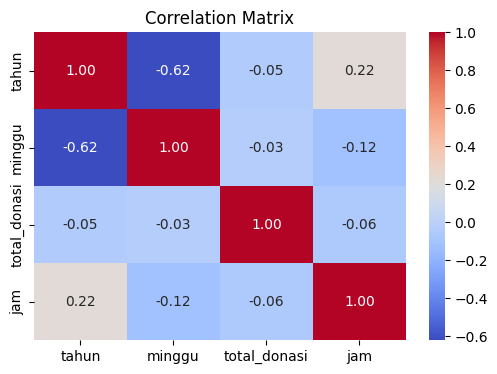

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misal df_transaksi sudah hasil dari fungsi clean_and_merge_transaksi
df_transaksi = clean_and_merge_transaksi(df_qris, df_manual)

# Ambil kolom numerik saja
numeric_cols = df_transaksi[["tahun", "minggu", "total_donasi", "jam"]]

# Hitung korelasi
corr_matrix = numeric_cols.corr()

# Tampilkan correlation matrix pakai heatmap seaborn
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Visualisasi Sederhana

In [22]:
import pandas as pd
import altair as alt

# top 10 donatur berdasarkan total donasi
top_donatur = (
    df_transaksi.groupby("nama_donatur")["total_donasi"]
    .sum()
    .reset_index()
    .sort_values(by="total_donasi", ascending=False)
    .head(10)
)

# Buat chart Altair
chart_donatur = alt.Chart(top_donatur).mark_bar().encode(
    x=alt.X("total_donasi:Q", title="Total Donasi"),
    y=alt.Y("nama_donatur:N", sort='-x'),
    tooltip=["nama_donatur", "total_donasi"]
).properties(title="Top 10 Donatur")

# Tampilkan chart (jika di notebook, cukup tulis chart_donatur)
chart_donatur.show()


alt.Chart(...)

In [23]:
# top 10 campaign berdasarkan total donasi
top_campaign = (
    df_transaksi.groupby("nama_campaign")["total_donasi"]
    .sum()
    .reset_index()
    .sort_values(by="total_donasi", ascending=False)
    .head(10)
)

# Buat chart Altair
chart_campaign = alt.Chart(top_campaign).mark_bar().encode(
    x=alt.X("total_donasi:Q", title="Total Donasi"),
    y=alt.Y("nama_campaign:N", sort='-x'),
    tooltip=["nama_campaign", "total_donasi"]
).properties(title="Top 10 Campaign")

# Tampilkan chart (di notebook cukup tulis chart_campaign)
chart_campaign.show()

alt.Chart(...)